# Importing required libraries

In [1]:
# Numerical libraries
import numpy as np

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns
import pandas as pd

# importing ploting libraries
import matplotlib.pyplot as plt

#importing seaborn for statistical plots
import seaborn as sns

# Loading the data

In [148]:
# Reading and viewing the dataset using Pandas
df = pd.read_csv('BAJAJ AUTO DATA.csv')
df

,timestamp,open,high,low,close,volume
0,2017-01-02 09:15:00+05:30,2640.15,2654.30,2617.55,2627.00,2235.0
1,2017-01-02 09:16:00+05:30,2627.00,2646.10,2612.35,2612.35,2806.0
2,2017-01-02 09:17:00+05:30,2614.45,2614.45,2591.30,2596.00,7443.0
3,2017-01-02 09:18:00+05:30,2596.00,2596.00,2587.75,2590.80,3289.0
4,2017-01-02 09:19:00+05:30,2593.00,2596.95,2584.00,2589.95,4862.0
...,...,...,...,...,...,...
370541,2021-01-01 15:25:00+05:30,3472.80,3475.85,3470.00,3470.05,2059.0
370542,2021-01-01 15:26:00+05:30,3470.05,3477.35,3469.15,3473.40,1991.0
370543,2021-01-01 15:27:00+05:30,3473.40,3475.00,3470.45,3470.45,1372.0
370544,2021-01-01 15:28:00+05:30,3470.45,3475.00,3470.00,3472.20,1442.0


In [9]:
# viewing the dimensions of df
df.shape

(370546, 6)

# Understanding the data

In [ ]:
# Timestamp - Stocks status at the date
# Open - Open price for current day
# High - Price made high for current day
# Low - Price made low for current day
# Close - Close price of day
# Volume - Traded volume

# Data preprocessing

In [13]:
# Viewing dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370546 entries, 0 to 370545
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  370546 non-null  object 
 1   open       370408 non-null  float64
 2   high       370408 non-null  float64
 3   low        370408 non-null  float64
 4   close      370408 non-null  float64
 5   volume     370408 non-null  float64
dtypes: float64(5), object(1)
memory usage: 17.0+ MB


In [15]:
# Viewing Descriptive statistics
df.describe()

,open,high,low,close,volume
count,370408.000000,370408.000000,370408.000000,370408.000000,370408.000000
mean,2898.400816,2899.832331,2896.904200,2898.373048,1397.918247
std,234.066533,233.865435,234.252521,234.068909,3314.378147
min,1794.150000,1804.850000,1788.650000,1795.000000,0.000000
25%,2765.550000,2766.950000,2764.450000,2765.500000,243.000000
50%,2881.250000,2882.400000,2880.050000,2881.250000,613.000000
75%,3049.550000,3050.950000,3048.000000,3049.450000,1491.000000
max,3491.850000,3493.950000,3491.000000,3491.850000,580811.000000


In [17]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [19]:
# Checking for null values
df.isnull().sum()

timestamp      0
open         138
high         138
low          138
close        138
volume       138
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370546 entries, 0 to 370545
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  370546 non-null  object 
 1   open       370408 non-null  float64
 2   high       370408 non-null  float64
 3   low        370408 non-null  float64
 4   close      370408 non-null  float64
 5   volume     370408 non-null  float64
dtypes: float64(5), object(1)
memory usage: 17.0+ MB


# Let us take one year's data from the dataset and name it as stock_price_one_year.

In [29]:
stockprice_one_year = df[(df['timestamp']>'2020-01-01')&(df['timestamp']<'2021-01-01')]
stockprice_one_year                                                       

,timestamp,open,high,low,close,volume
275985,2020-01-01 09:15:00+05:30,3183.00,3184.90,3171.30,3177.40,4188.0
275986,2020-01-01 09:16:00+05:30,3177.40,3181.00,3175.00,3175.00,5288.0
275987,2020-01-01 09:17:00+05:30,3175.00,3177.70,3174.00,3175.45,3117.0
275988,2020-01-01 09:18:00+05:30,3176.00,3177.45,3174.30,3177.45,1823.0
275989,2020-01-01 09:19:00+05:30,3177.00,3179.00,3175.95,3178.00,832.0
...,...,...,...,...,...,...
370166,2020-12-31 15:25:00+05:30,3438.00,3444.75,3437.95,3442.60,2666.0
370167,2020-12-31 15:26:00+05:30,3442.65,3442.65,3437.45,3441.20,2724.0
370168,2020-12-31 15:27:00+05:30,3441.95,3441.95,3440.70,3441.45,1454.0
370169,2020-12-31 15:28:00+05:30,3441.60,3448.00,3435.55,3435.60,4718.0


In [31]:
stockprice_one_year.isnull().sum()

timestamp      0
open         122
high         122
low          122
close        122
volume       122
dtype: int64

In [232]:
stockprice_one_year = stockprice_one_year.dropna()

In [234]:
stockprice_one_year.describe()

,open,high,low,close,volume
count,94064.000000,94064.000000,94064.000000,94064.000000,94064.000000
mean,2886.266536,2888.161989,2884.311502,2886.242551,2266.869759
std,312.654294,312.136819,313.165028,312.659983,3746.429021
min,1794.150000,1804.850000,1788.650000,1795.000000,0.000000
25%,2742.587500,2744.687500,2740.137500,2742.500000,555.000000
50%,2976.300000,2978.225000,2974.200000,2976.150000,1226.000000
75%,3080.000000,3081.600000,3078.900000,3080.000000,2603.000000
max,3471.900000,3472.850000,3470.000000,3471.900000,231814.000000


In [236]:
stockprice_one_year.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94064 entries, 2020-01-01 09:15:00+05:30 to 2020-12-31 15:29:00+05:30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    94064 non-null  float64
 1   high    94064 non-null  float64
 2   low     94064 non-null  float64
 3   close   94064 non-null  float64
 4   volume  94064 non-null  float64
dtypes: float64(5)
memory usage: 4.3 MB


# Data visualization

In [ ]:
# Let us compare stockprice_one_year['feature_name'].plot() vs df['feature_name'].plot() 

<Axes: xlabel='timestamp'>

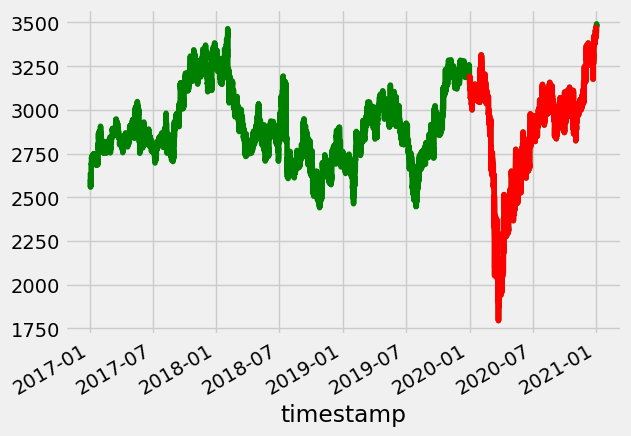

In [238]:
pl = df['open'].plot(c='green')
stockprice_one_year['open'].plot(ax=pl,c='red')

<Axes: xlabel='timestamp'>

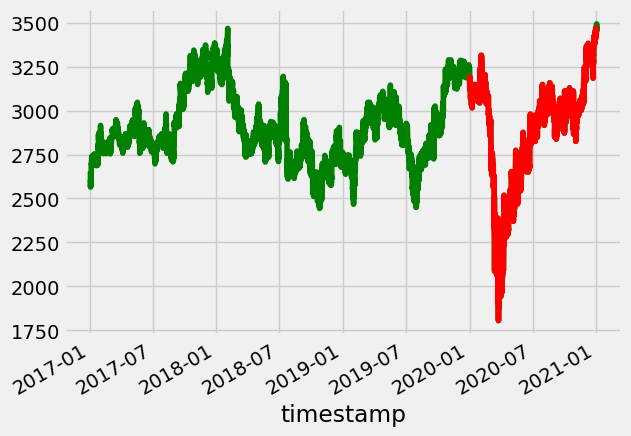

In [239]:
pl = df['high'].plot(c='green')
stockprice_one_year['high'].plot(ax=pl,c='red')

<Axes: xlabel='timestamp'>

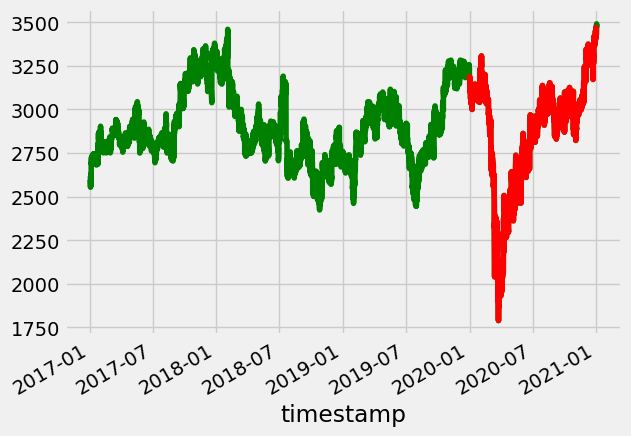

In [240]:
pl = df['low'].plot(c='green')
stockprice_one_year['low'].plot(ax=pl,c='red')

<Axes: xlabel='timestamp'>

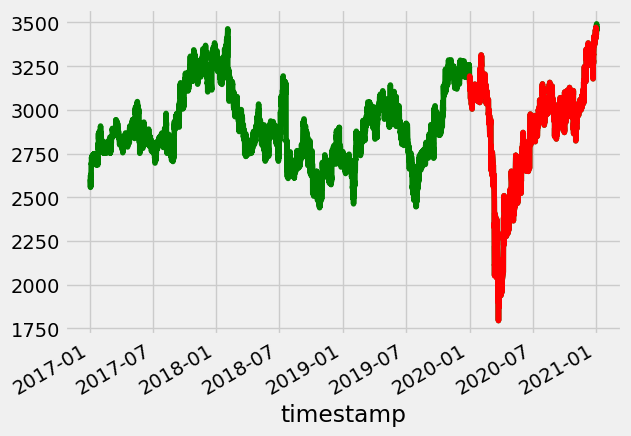

In [241]:
pl = df['close'].plot(c='green')
stockprice_one_year['close'].plot(ax=pl,c='red')

<Axes: xlabel='timestamp'>

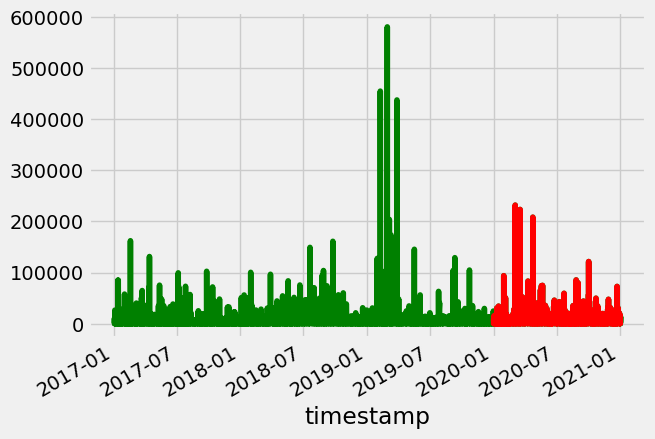

In [242]:
pl = df['volume'].plot(c='green')
stockprice_one_year['volume'].plot(ax=pl,c='red')

# Now,let us check matplotlib's plotting

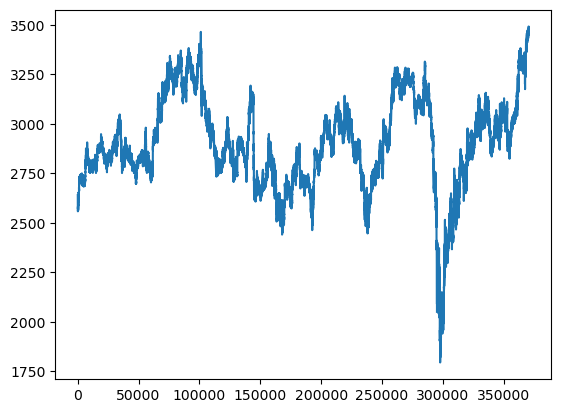

In [39]:
plt.plot(df['open'])

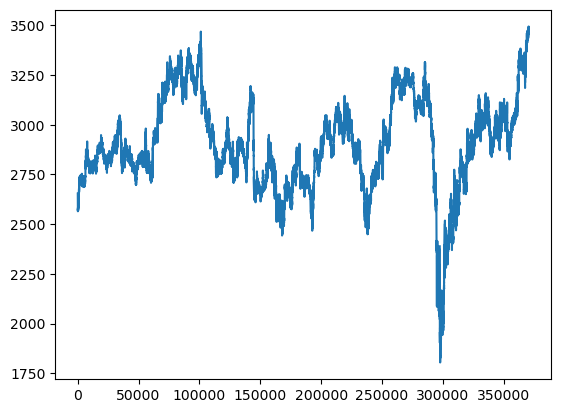

In [41]:
plt.plot(df['high'])

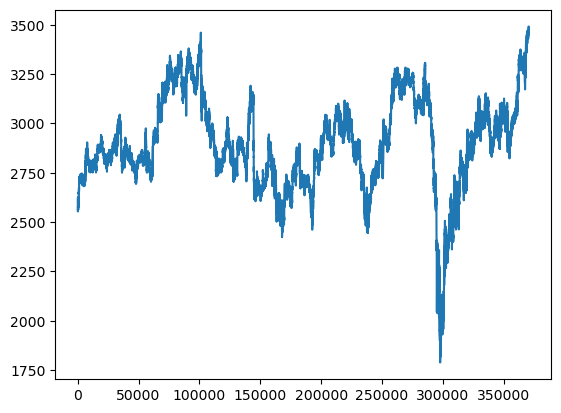

In [43]:
plt.plot(df['low'])

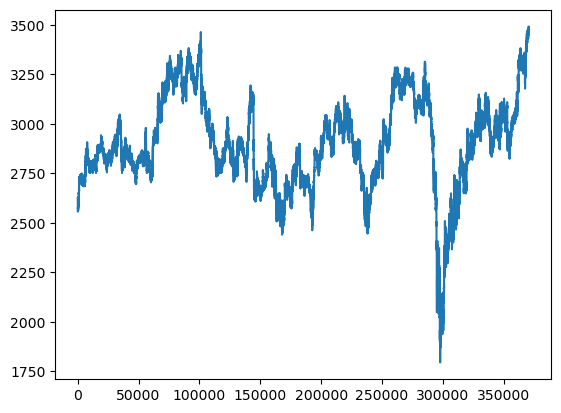

In [45]:
plt.plot(df['close'])

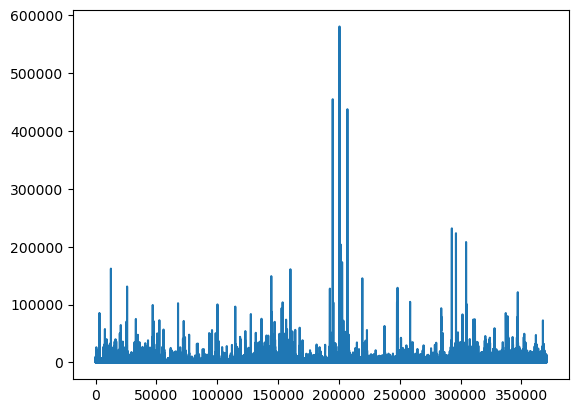

In [47]:
plt.plot(df['volume'])

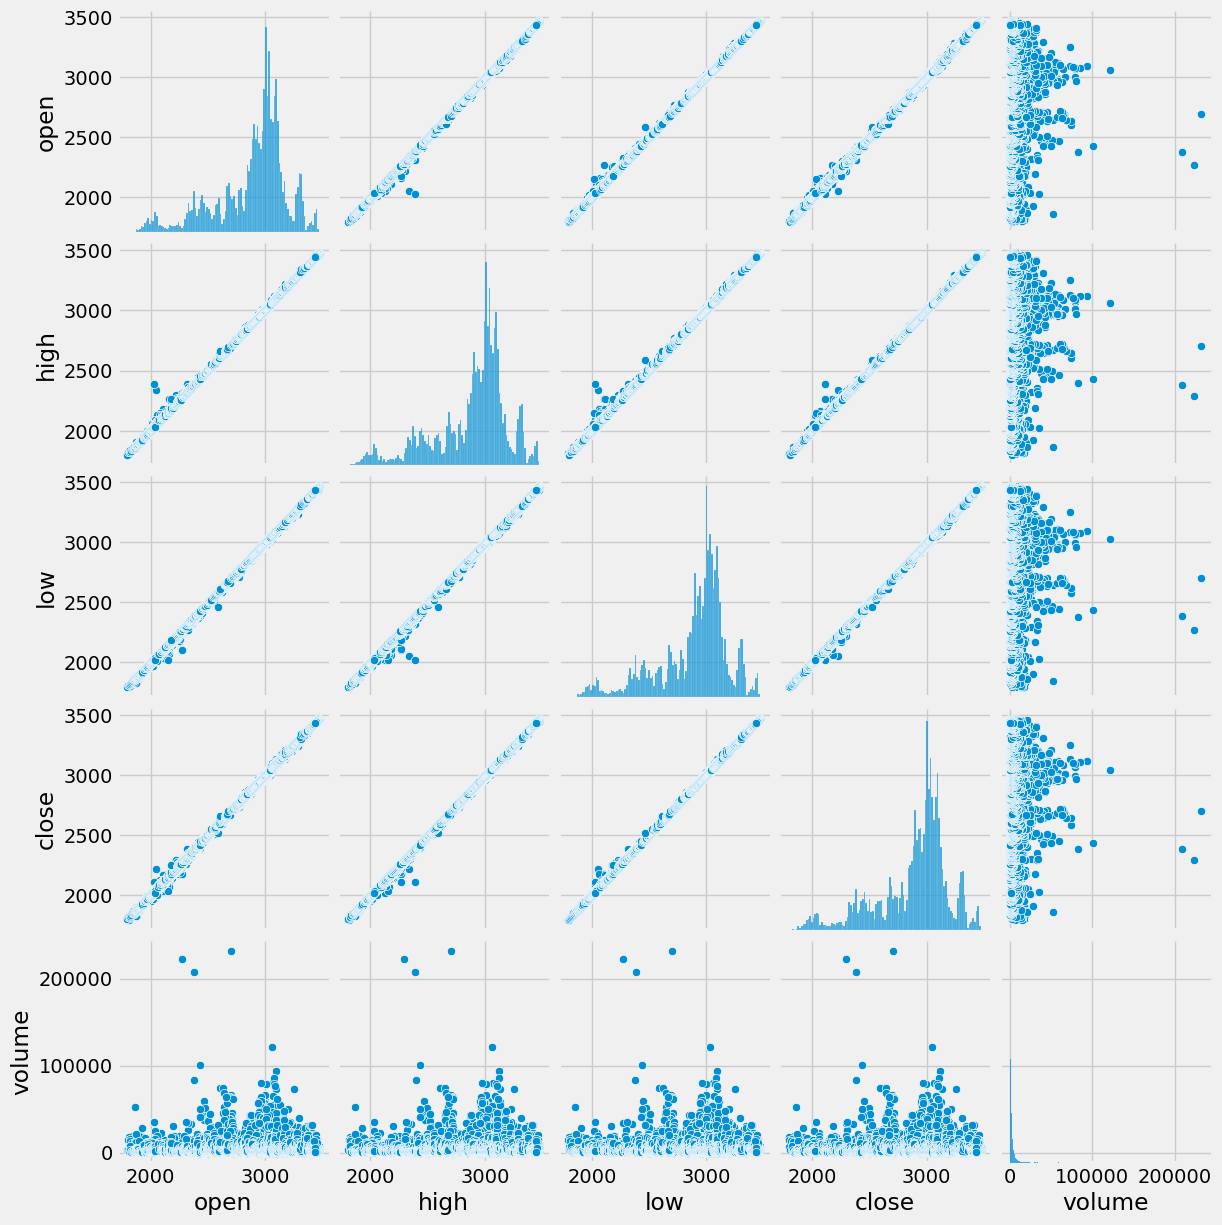

In [248]:
sns.pairplot(stockprice_one_year)
plt.show()

# Finding correlation between the features, making a heatmap.

In [150]:
#Setting Timestamp as Index and viewing dataset
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df.head()

,open,high,low,close,volume
timestamp,,,,,
2017-01-02 09:15:00+05:30,2640.15,2654.30,2617.55,2627.00,2235.0
2017-01-02 09:16:00+05:30,2627.00,2646.10,2612.35,2612.35,2806.0
2017-01-02 09:17:00+05:30,2614.45,2614.45,2591.30,2596.00,7443.0
2017-01-02 09:18:00+05:30,2596.00,2596.00,2587.75,2590.80,3289.0
2017-01-02 09:19:00+05:30,2593.00,2596.95,2584.00,2589.95,4862.0


In [71]:
df.corr()

,open,high,low,close,volume
open,1.000000,0.999957,0.999956,0.999936,-0.032947
high,0.999957,1.000000,0.999922,0.999961,-0.030318
low,0.999956,0.999922,1.000000,0.999963,-0.035666
close,0.999936,0.999961,0.999963,1.000000,-0.032928
volume,-0.032947,-0.030318,-0.035666,-0.032928,1.000000


In [250]:
stockprice_one_year.corr()

,open,high,low,close,volume
open,1.000000,0.999955,0.999962,0.999941,-0.022069
high,0.999955,1.000000,0.999927,0.999962,-0.019434
low,0.999962,0.999927,1.000000,0.999967,-0.024743
close,0.999941,0.999962,0.999967,1.000000,-0.021999
volume,-0.022069,-0.019434,-0.024743,-0.021999,1.000000


<Axes: >

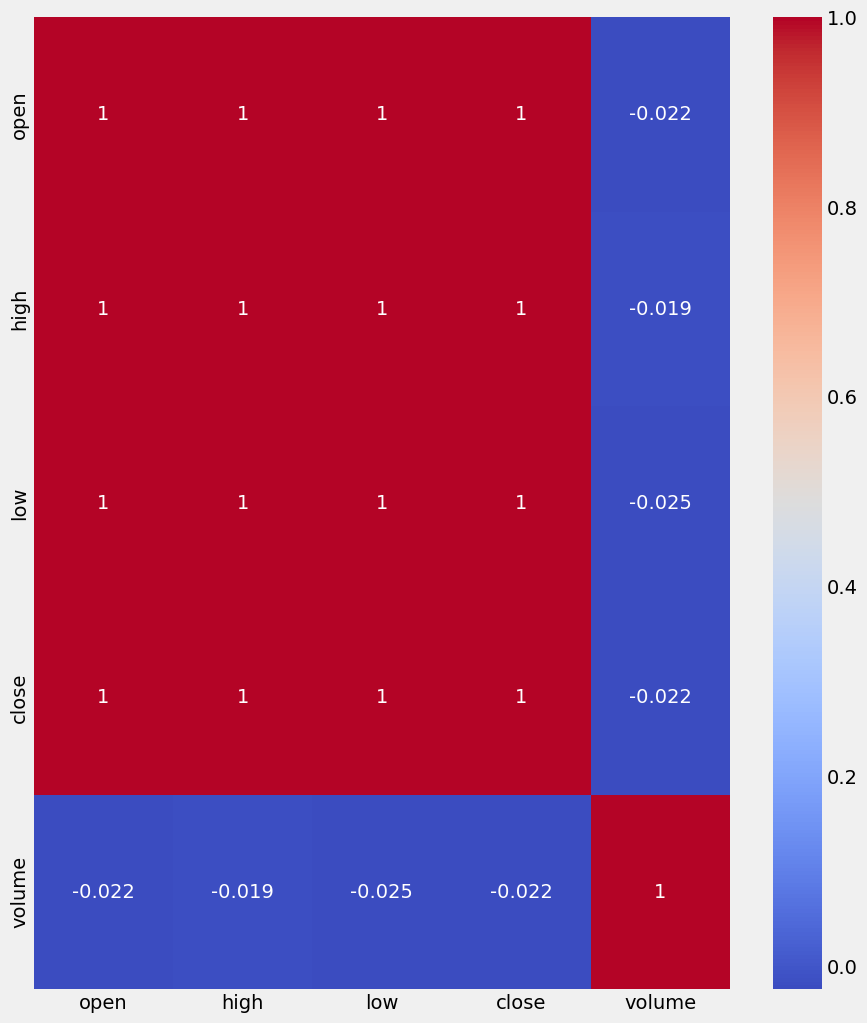

In [276]:
plt.figure(figsize=(10,12))
sns.heatmap(stockprice_one_year.corr(method='pearson'), annot= True,cmap='coolwarm')

# Data Splitting

In [254]:
x = stockprice_one_year[['open','high','low']]
y = stockprice_one_year['close']

In [256]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [258]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(75251, 3) (18813, 3) (75251,) (18813,)


In [260]:
Y_test

timestamp
2020-07-13 12:56:00+05:30    2899.80
2020-03-27 12:03:00+05:30    2057.00
2020-03-16 14:02:00+05:30    2358.20
2020-01-30 14:17:00+05:30    3148.10
2020-07-07 14:10:00+05:30    2838.00
                              ...   
2020-11-05 15:27:00+05:30    2968.00
2020-02-11 11:16:00+05:30    3136.55
2020-06-02 09:46:00+05:30    2782.00
2020-09-23 13:36:00+05:30    2986.60
2020-02-24 11:21:00+05:30    3021.45
Name: close, Length: 18813, dtype: float64

# Model selection

In [262]:
from sklearn.linear_model import LinearRegression

In [264]:
lr = LinearRegression()

In [266]:
lr.fit(X_train, Y_train)

LinearRegression()

In [268]:
y_pred = lr.predict(X_test)

# Model efficiency

In [270]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [274]:
print("Mean Aboslute Error", mean_absolute_error(y_pred, Y_test))
print("Mean Squared Error", mean_squared_error(y_pred, Y_test))
print("R2", r2_score(y_pred,Y_test))

Mean Aboslute Error 0.9970764632758988
Mean Squared Error 3.707804549146608
R2 0.9999623844096502
